In [25]:
import pandas as pd
dataset=pd.read_csv("C:\data science\Churn_Modelling.csv")

In [26]:
dataset.head(3)

,x,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1


In [27]:
dataset.isnull().sum()

x                  0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [28]:
dataset.shape

(10002, 14)

In [29]:
dataset.dropna(inplace=True,axis=0)
dataset.head(3)

,x,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1


In [30]:
dataset.drop(columns=['Geography','Surname','Gender'],axis=1,inplace=True)

In [31]:
input_data=dataset.iloc[:,:-1]
output_data=dataset.iloc[:,-1]

In [32]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
input_data=pd.DataFrame(ss.fit_transform(input_data),columns=input_data.columns)

In [33]:
input_data.head(3)

,x,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-1.733261,-0.783315,-0.326298,0.293657,-1.041838,-1.225860,-0.911570,0.646028,0.970820,0.021720
1,-1.732914,-0.606606,-0.440137,0.198305,-1.387619,0.117428,-0.911570,-1.547921,0.970820,0.216366
2,-1.732568,-0.996022,-1.537125,0.293657,1.032846,1.333214,2.526981,0.646028,-1.030057,0.240519


In [34]:
import tensorflow

In [35]:
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import L2
from keras.callbacks import EarlyStopping

In [36]:
ann=Sequential()

In [37]:
ann.add(Dense(6,input_dim=10,activation='relu'))
ann.add(Dense(4,activation='relu'))
ann.add(Dense(2,activation='relu'))
ann.add(Dense(1,activation='sigmoid'))

C:\Users\jpjai\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(input_data,output_data,test_size=0.2,random_state=10)

In [41]:
x_train.shape

(7998, 10)

In [42]:
ann.fit(x_train,y_train, batch_size=100, epochs=5)  #do epoch=50 for accuracy

Epoch 1/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2098 - loss: 1.0863
Epoch 2/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3904 - loss: 0.7749
Epoch 3/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6784 - loss: 0.6724
Epoch 4/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7951 - loss: 0.6378
Epoch 5/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8058 - loss: 0.6214


In [43]:
prd=ann.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [44]:
prd

array([[0.42291853],
       [0.42291853],
       [0.42291853],
       ...,
       [0.42291853],
       [0.42291853],
       [0.42291853]], dtype=float32)

In [45]:
prd1=ann.predict(x_train)
prd_data1=[]
for i in prd1 :
    if i[0]>0.5:
        prd_data1.append(1)
    else:
        prd_data1.append(0)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [46]:
prd_data=[]
for i in prd :
    if i[0]>0.5:
        prd_data.append(1)
    else:
        prd_data.append(0)

In [47]:
from sklearn.metrics import accuracy_score


## Accuracy after changing random state

In [48]:
accuracy_score(y_test,prd_data)*100

81.35

In [49]:
accuracy_score(y_train,prd_data1)*100

80.80770192548137

y_test

In [51]:
prd=ann.predict(x_test.iloc[:1,:])
prd_data=[]
for i in prd :
    if i[0]>0.5 :
        prd_data.append(1)
    else:
        prd_data.append(0)
prd_data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


[0]

In [61]:
## predictions on any data:-

In [52]:


# prd=ann.predict(pd.DataFrame([[-0.303688,-0.364004,0.253243,-0.659863,1.724407,-1.225860,0.807705,0.646028,-1.030057,1.590140]]))
# prd_data=[]
# for i in prd :
#     if i[0]>0.5 :
#         prd_data.append(1)
#     else:
#         prd_data.append(0)
# prd_data

## EARLY STOPPAGE

In [53]:
import matplotlib.pyplot as plt
ann.fit(x_train,y_train, batch_size=100, epochs=5, validation_data=(x_test, y_test),callbacks=EarlyStopping())  #do epoch=50 for accuracy

Epoch 1/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8124 - loss: 0.6057 - val_accuracy: 0.8125 - val_loss: 0.5958
Epoch 2/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8111 - loss: 0.5935 - val_accuracy: 0.8130 - val_loss: 0.5834
Epoch 3/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8108 - loss: 0.5811 - val_accuracy: 0.8160 - val_loss: 0.5718
Epoch 4/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8092 - loss: 0.5714 - val_accuracy: 0.8165 - val_loss: 0.5609
Epoch 5/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8152 - loss: 0.5576 - val_accuracy: 0.8185 - val_loss: 0.5508


In [54]:
ann.history.history

{'accuracy': [0.8070767521858215,
  0.8080770373344421,
  0.8079519867897034,
  0.8094523549079895,
  0.8109527230262756],
 'loss': [0.6039154529571533,
  0.591326117515564,
  0.5795310735702515,
  0.568439245223999,
  0.5580753684043884],
 'val_accuracy': [0.8125,
  0.8130000233650208,
  0.8159999847412109,
  0.8165000081062317,
  0.8184999823570251],
 'val_loss': [0.5957745313644409,
  0.5834193229675293,
  0.5718002319335938,
  0.5609195232391357,
  0.5507524013519287]}

In [55]:
train_accuracy= ann.history.history['accuracy']
test_accuracy= ann.history.history['val_accuracy']

In [56]:
len(train_accuracy)    # same as no of epochs you used 

5

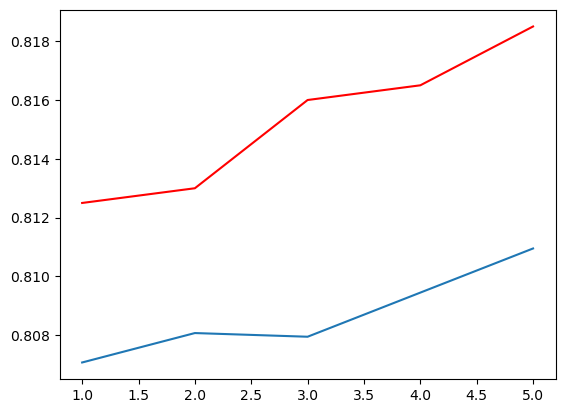

In [57]:
plt.plot([i for i in range(1,6)],train_accuracy)
plt.plot([i for i in range(1,6)],test_accuracy,c='red')
plt.show()

In [58]:
prd=ann.predict(x_test)
prd_data=[]
for i in prd :
    if i[0]>0.5 :
        prd_data.append(1)
    else:
        prd_data.append(0)
prd_data
accuracy_score(y_test,prd_data)*100

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


81.85

In [59]:
accuracy_score(y_train,prd_data1)*100

80.80770192548137

In [65]:
# Note: We observed that accuracy increased using early stopping, slightly rising from 81.35 to 81.85.